In [20]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from datetime import datetime
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
import math
from statistics import median
import seaborn as sns
import re
plt.style.use('ggplot')
pd.options.mode.chained_assignment = None  # default='warn'

In [21]:
dffilm = pd.read_csv(Path('./Resources/train.csv'))

In [22]:
dffilm.drop(['belongs_to_collection','genres','homepage',
            'imdb_id','spoken_languages','overview','title','poster_path','production_companies',
            'production_countries','original_title','tagline','Keywords','cast','crew'], axis=1, inplace=True)
dffilm.head()

,id,budget,original_language,popularity,release_date,runtime,status,revenue
0,391,6843500,it,3.800073,12/22/12,0.0,Released,10703234
1,592,0,ru,0.402368,12/4/03,0.0,Released,234748
2,925,0,es,1.926826,11/15/13,0.0,Released,850259
3,978,11000000,it,5.010563,10/27/11,0.0,Released,12935800
4,1256,0,it,1.623440,8/25/75,0.0,Released,39598448


In [23]:
#plt.scatter(dffilm.original_language,dffilm.revenue)
dffilm.revenue

0        10703234
1          234748
2          850259
3        12935800
4        39598448
          ...    
2995    122700000
2996     71000000
2997       871279
2998        31000
2999        65335
Name: revenue, Length: 3000, dtype: int64

In [24]:


X_releasedate =dffilm
for m in range(0,len(dffilm.release_date)):
    film_date = dffilm.release_date[m]
    dt = datetime.strptime(film_date, '%m/%d/%y')
    #dffilm.release_date[m] = datetime_object.timetuple().tm_yday
    X_releasedate.release_date[m]= dt.month
    
for i in range(0,len(dffilm.original_language)):
    if dffilm.original_language[i]== 'en':
        X_releasedate.original_language[i] = 1
    else:
        X_releasedate.original_language[i] = 0
        

for j in range(0,len(dffilm.status)):
    if dffilm.status[j]== 'Released':
        X_releasedate.status[j] = 1
    else:
        X_releasedate.status[j] = 0        
        
X_releasedate =X_releasedate[X_releasedate['runtime'] !=0]
X_releasedate =X_releasedate[X_releasedate['revenue'] !=0]
X_releasedate =X_releasedate[X_releasedate['revenue'] >100]
X_releasedate =X_releasedate[X_releasedate['budget'] !=0]
X_releasedate

,id,budget,original_language,popularity,release_date,runtime,status,revenue
17,2576,250000,1,4.297654,12,62.0,1,1000000
19,188,259000,1,0.722511,11,65.0,1,921000
20,488,4500000,0,1.833185,3,65.0,1,3468423
21,2278,8000000,0,7.321152,10,66.0,1,292279
22,1764,250000,1,8.168456,1,68.0,1,2500000
...,...,...,...,...,...,...,...,...
2994,1303,44000000,1,4.393576,11,219.0,1,3484331
2995,524,13000000,1,11.147040,10,220.0,1,122700000
2996,1923,31115000,1,8.591238,6,248.0,1,71000000
2997,1212,18000000,1,4.558075,5,338.0,1,871279


In [25]:
X_releasedate['release_date']=X_releasedate.release_date.astype('int64')
X_releasedate['original_language']=X_releasedate.original_language.astype('int64')
X_releasedate['status']=X_releasedate.status.astype('int64')

In [26]:
X = X_releasedate.dropna().copy()


In [27]:

X=X_releasedate.dropna()
y=X_releasedate.dropna()
X.drop(['id','budget','popularity','release_date','runtime','original_language','revenue'], axis=1, inplace=True)
y.drop(['id','budget','popularity','release_date','runtime','status','original_language'], axis=1, inplace=True)
X.shape
y.shape
X

,status
17,1
19,1
20,1
21,1
22,1
...,...
2993,1
2994,1
2995,1
2996,1


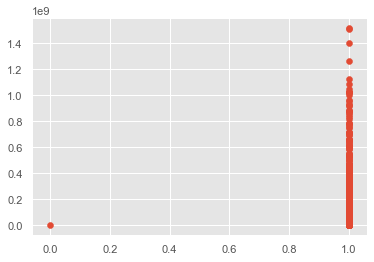

In [28]:
plt.scatter(X.status,y.revenue)
#plt.scatter(X,y)

In [29]:
X = X_releasedate.reshape(-1, 1)
X[:5]

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [30]:
X.shape

(2161, 1)

In [31]:
y.shape

(2161, 1)

In [32]:
model = LinearRegression()
model


# Fit the data into the model
model.fit(X, y)

LinearRegression()

In [33]:
# The slope
print(model.coef_)

[[87846307.99444447]]


In [34]:
# The y-intercept
print(model.intercept_)

[228999.99999997]


In [35]:
# The model creates predicted y values based on X values
predicted_y_values = model.predict(X)
print(X)

      status
17         1
19         1
20         1
21         1
22         1
...      ...
2993       1
2994       1
2995       1
2996       1
2997       1

[2161 rows x 1 columns]


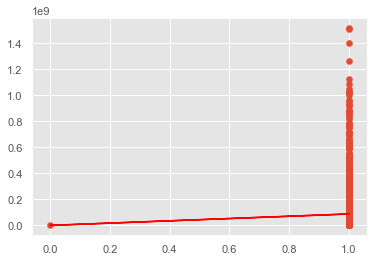

In [36]:
#Plot the results. The best fit line is red.
plt.scatter(X.status, y.revenue)
plt.plot(X,predicted_y_values,color='red')

/Users/vikramjindal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


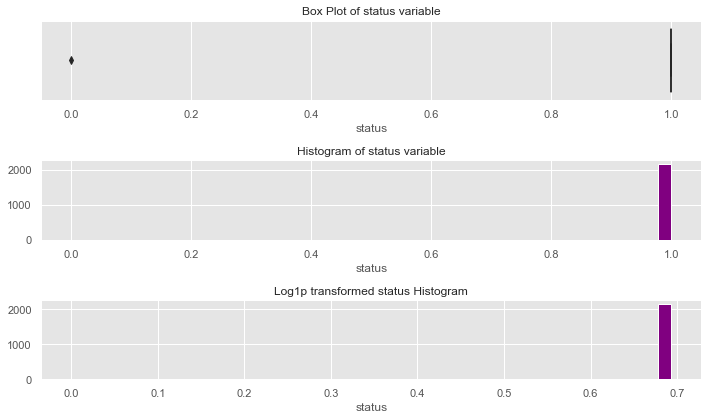

In [37]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=X.status, ax = ax[0], color='purple')
ax[0].set_title("Box Plot of status variable")
sns.distplot(a=X.status, kde = False, ax = ax[1], color='purple', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of status variable")
sns.distplot(a=np.log1p(X.status), kde = False, ax = ax[2], color='purple', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed status Histogram")
f.tight_layout()

In [19]:
dffilm['status'].describe()

count     3000
unique       2
top          1
freq      2996
Name: status, dtype: int64